In [8]:
import pandas as pd

data = {
    "id": [1, 2, 3, 4, 5],
    "text": [
        "The service was excellent",
        "The delivery was very late",
        "The price is good, but the packaging is weak",
        "I will not order again",
        "A sweet experience and I will repeat it"
    ],
    "rating": [5, 2, 3, 1, 4]
}

df = pd.DataFrame(data)

from pathlib import Path
import os

# 1) اعرف الـCWD الحالي
print("CWD:", os.getcwd())

# 2) حدّد مجلد المشروع تلقائيًا:
#    لو مفيش data في الـCWD، جرّب الأب.. (ينفع لو الكيرنل شغّال من notebooks/)
cwd = Path.cwd()
project_root = cwd if (cwd / "data").exists() else cwd.parent

# 3) أنشئ مجلد data لو مش موجود
data_dir = project_root / "data"
data_dir.mkdir(parents=True, exist_ok=True)

# 4) استخدم مسار صريح عند الحفظ
csv_path = data_dir / "customer_feedback.csv"
print("Saving to:", csv_path)
df.to_csv(csv_path, index=False)

df.to_csv("data/customer_feedback.csv", index=False)
print(df)



CWD: c:\Users\oa393\OneDrive\المستندات\ml-learning-omar
Saving to: c:\Users\oa393\OneDrive\المستندات\ml-learning-omar\data\customer_feedback.csv
   id                                          text  rating
0   1                     The service was excellent       5
1   2                    The delivery was very late       2
2   3  The price is good, but the packaging is weak       3
3   4                        I will not order again       1
4   5       A sweet experience and I will repeat it       4


In [9]:
# 👀 نعرض أول 5 صفوف
print("first 5 rows")
display(df.head())

# 🔍 نعرف معلومات الأعمدة وأنواعها
print("\nℹ️ informations about data")
print(df.info())

# 🧮 عدد القيم الفاضية في كل عمود
print("\n❌ Missing values:")
print(df.isnull().sum())

# 🔁 عدد الصفوف المكررة
print("\n🔁 عدد الصفوف المكررة:")
print(df.duplicated().sum())

# 📊 وصف رقمي للأعمدة الرقمية (زي التقييم)
print("\n📊 إحصائيات العمود 'rating':")
print(df["rating"].describe())



first 5 rows


,id,text,rating
0,1,The service was excellent,5
1,2,The delivery was very late,2
2,3,"The price is good, but the packaging is weak",3
3,4,I will not order again,1
4,5,A sweet experience and I will repeat it,4



ℹ️ informations about data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5 non-null      int64 
 1   text    5 non-null      object
 2   rating  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes
None

❌ Missing values:
id        0
text      0
rating    0
dtype: int64

🔁 عدد الصفوف المكررة:
0

📊 إحصائيات العمود 'rating':
count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
Name: rating, dtype: float64


In [10]:
# نحذف أي صف فيه قيم ناقصة (لو وجدت)
df = df.dropna()

# نحذف التكرارات (لو وجدت)
df = df.drop_duplicates()

# نعيد ضبط الفهارس
df = df.reset_index(drop=True)

print("✅ الداتا بعد التنضيف:")
display(df)


✅ الداتا بعد التنضيف:


,id,text,rating
0,1,The service was excellent,5
1,2,The delivery was very late,2
2,3,"The price is good, but the packaging is weak",3
3,4,I will not order again,1
4,5,A sweet experience and I will repeat it,4


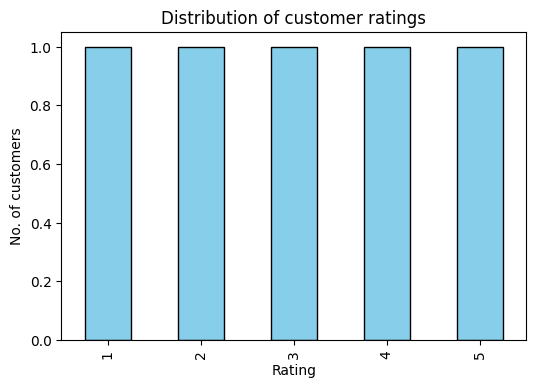

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df["rating"].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of customer ratings") 
plt.xlabel("Rating")
plt.ylabel("No. of customers")
plt.show()

In [14]:
import re

def clean_text(text):
    # نحول النص لحروف صغيرة
    text = text.lower()
    # نحذف الرموز، الأرقام، والعلامات الغريبة
    text = re.sub(r"[^ء-يa-zA-Z\s]", "", text)
    # نحذف المسافات الزايدة
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)

print("✅ بعد التنضيف:")
print(df[["text", "clean_text"]])

✅ بعد التنضيف:
                                           text  \
0                     The service was excellent   
1                    The delivery was very late   
2  The price is good, but the packaging is weak   
3                        I will not order again   
4       A sweet experience and I will repeat it   

                                    clean_text  
0                    the service was excellent  
1                   the delivery was very late  
2  the price is good but the packaging is weak  
3                       i will not order again  
4      a sweet experience and i will repeat it  


In [15]:
import nltk
nltk.download('punkt', quiet=True)
from nltk.tokenize import word_tokenize

df["tokens"] = df["clean_text"].apply(word_tokenize)
print(df[["clean_text", "tokens"]])

                                    clean_text  \
0                    the service was excellent   
1                   the delivery was very late   
2  the price is good but the packaging is weak   
3                       i will not order again   
4      a sweet experience and i will repeat it   

                                              tokens  
0                     [the, service, was, excellent]  
1                   [the, delivery, was, very, late]  
2  [the, price, is, good, but, the, packaging, is...  
3                       [i, will, not, order, again]  
4   [a, sweet, experience, and, i, will, repeat, it]  


In [16]:
df.to_csv("data/cleaned_feedback.csv", index=False)
print("💾 Saved cleaned data to data/cleaned_feedback.csv")

💾 Saved cleaned data to data/cleaned_feedback.csv


In [18]:
# 🧩 Step 1: Import TF-IDF tools and load the cleaned dataset
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# نقرأ الملف اللي نظفناه
df = pd.read_csv("data/cleaned_feedback.csv")

# نعرض أول 5 صفوف للتأكيد
print(df.head())

# ⚙️ Step 2: Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    max_features=10,       # نختار أول 10 كلمات مهمة (للتوضيح فقط)
    stop_words='english'   # نحذف الكلمات العامة (the, is, etc.)
)

# نحول النصوص إلى مصفوفة أرقام
X = vectorizer.fit_transform(df["clean_text"])

# نحولها DataFrame لسهولة القراءة
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("\n✅ TF-IDF Matrix:")
print(tfidf_df)

# نحفظها لو عايز نستخدمها بعدين
tfidf_df.to_csv("data/tfidf_vectors.csv", index=False)
print("💾 Saved TF-IDF vectors to data/tfidf_vectors.csv")


   id                                          text  rating  \
0   1                     The service was excellent       5   
1   2                    The delivery was very late       2   
2   3  The price is good, but the packaging is weak       3   
3   4                        I will not order again       1   
4   5       A sweet experience and I will repeat it       4   

                                    clean_text  \
0                    the service was excellent   
1                   the delivery was very late   
2  the price is good but the packaging is weak   
3                       i will not order again   
4      a sweet experience and i will repeat it   

                                              tokens  
0             ['the', 'service', 'was', 'excellent']  
1         ['the', 'delivery', 'was', 'very', 'late']  
2  ['the', 'price', 'is', 'good', 'but', 'the', '...  
3             ['i', 'will', 'not', 'order', 'again']  
4  ['a', 'sweet', 'experience', 'and', 'i', '

In [19]:
# 🧠 Step 1: Import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📥 Step 2: Load cleaned data
df = pd.read_csv("data/cleaned_feedback.csv")

# نستخدم عمود clean_text كـ input وعمود sentiment كـ output
X_text = df["clean_text"]
y = df["sentiment"]

# 🔠 Step 3: Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X_text)

# ✂️ Step 4: Split data (train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ⚙️ Step 5: Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# 🔍 Step 6: Evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


KeyError: 'sentiment'

In [20]:
import pandas as pd

# نقرأ الملف اللي فيه النصوص المنظّفة
df = pd.read_csv("data/cleaned_feedback.csv")

# نعيد إنشاء عمود sentiment بناءً على rating
def label_sentiment(r):
    if r >= 4:
        return "positive"
    elif r == 3:
        return "neutral"
    else:
        return "negative"

df["sentiment"] = df["rating"].apply(label_sentiment)

# نطبع أول 5 صفوف نتأكد
print(df[["clean_text", "rating", "sentiment"]])

# نحفظ الملف الجديد
df.to_csv("data/cleaned_feedback.csv", index=False)
print("✅ Added sentiment column and updated cleaned_feedback.csv")


                                    clean_text  rating sentiment
0                    the service was excellent       5  positive
1                   the delivery was very late       2  negative
2  the price is good but the packaging is weak       3   neutral
3                       i will not order again       1  negative
4      a sweet experience and i will repeat it       4  positive
✅ Added sentiment column and updated cleaned_feedback.csv


In [22]:
# نقرأ الملف بعد التحديث
df = pd.read_csv("data/cleaned_feedback.csv")

X_text = df["clean_text"]
y = df["sentiment"]

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# تحويل النصوص إلى TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X_text)

# تقسيم البيانات لتدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تدريب الموديل
model = LogisticRegression()
model.fit(X_train, y_train)

# التقييم
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.5

📊 Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


🧩 Confusion Matrix:
[[0 1]
 [0 1]]


c:\Users\oa393\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\oa393\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\oa393\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [28]:
# ✍️ Manual prediction
test_sentences = [
    "I loved the service, it was perfect!",
    "The delivery was slow and the package was damaged.",
    "It was okay, not too bad and not great."
]

# نحولهم بنفس الـvectorizer اللي اتدرّب عليه الموديل
X_test_manual = vectorizer.transform(test_sentences)
y_pred_manual = model.predict(X_test_manual)

# نعرض النتايج
for sent, pred in zip(test_sentences, y_pred_manual):
    print(f"🗣️ {sent} → 🧠 Predicted sentiment: {pred}")


🗣️ I loved the service, it was perfect! → 🧠 Predicted sentiment: positive
🗣️ The delivery was slow and the package was damaged. → 🧠 Predicted sentiment: positive
🗣️ It was okay, not too bad and not great. → 🧠 Predicted sentiment: positive


In [30]:
custom_sentences = [
    "The food was bad.",
    "Amazing taste and quick delivery!",
    "Not bad, but could be better next time."
]

X_custom = vectorizer.transform(custom_sentences)
pred_custom = model.predict(X_custom)

for s, p in zip(custom_sentences, pred_custom):
    print(f"🗣️ {s} → 🧠 {p}")


🗣️ The food was bad. → 🧠 positive
🗣️ Amazing taste and quick delivery! → 🧠 positive
🗣️ Not bad, but could be better next time. → 🧠 positive


In [2]:
import zipfile
import os

# تحديد المسار للملف اللي رفعته
zip_path = "archive.zip"
extract_dir = "data/extracted"

# فك الضغط
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Files extracted to:", extract_dir)
print(os.listdir(extract_dir))


✅ Files extracted to: data/extracted
['sentiment labelled sentences']


In [3]:
import os

inner_dir = "data/extracted/sentiment labelled sentences"
print(os.listdir(inner_dir))

['amazon_cells_labelled.csv', 'amazon_cells_labelled.txt', 'imdb_labelled.csv', 'imdb_labelled.txt', 'readme.txt', 'sentiment labelled sentences', 'yelp_labelled.csv', 'yelp_labelled.txt']


In [6]:
import pandas as pd

# نقرأ ملف IMDB
file_path = "data/extracted/sentiment labelled sentences/imdb_labelled.txt"

df_new = pd.read_csv(file_path, sep='\t', header=None, names=['text', 'label'])
print(df_new.head())
print("\nLabel distribution:")
print(df_new['label'].value_counts())


                                                text  label
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0
2  Attempting artiness with black & white and cle...      0
3       Very little music or anything to speak of.        0
4  The best scene in the movie was when Gerardo i...      1

Label distribution:
label
1    386
0    362
Name: count, dtype: int64


In [7]:
df_new["sentiment"] = df_new["label"].map({1: "positive", 0: "negative"})
df_new = df_new.drop(columns=["label"])

# حفظ الملف الجديد
df_new.to_csv("data/sentiment_dataset.csv", index=False)

print("💾 Saved new dataset to data/sentiment_dataset.csv")
print(df_new.head())


💾 Saved new dataset to data/sentiment_dataset.csv
                                                text sentiment
0  A very, very, very slow-moving, aimless movie ...  negative
1  Not sure who was more lost - the flat characte...  negative
2  Attempting artiness with black & white and cle...  negative
3       Very little music or anything to speak of.    negative
4  The best scene in the movie was when Gerardo i...  positive


In [10]:
# 🧠 Step 1: استيراد المكتبات
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📥 Step 2: تحميل الداتا الجديدة
df = pd.read_csv("data/sentiment_dataset.csv")
print(df.head())
print("\nData size:", len(df))
print("Sentiment distribution:\n", df["sentiment"].value_counts())

# 🔠 Step 3: تحويل النصوص إلى تمثيل رقمي (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df["text"])
y = df["sentiment"]

# ✂️ Step 4: تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚙️ Step 5: تدريب الموديل
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 🔍 Step 6: التقييم
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


                                                text sentiment
0  A very, very, very slow-moving, aimless movie ...  negative
1  Not sure who was more lost - the flat characte...  negative
2  Attempting artiness with black & white and cle...  negative
3       Very little music or anything to speak of.    negative
4  The best scene in the movie was when Gerardo i...  positive

Data size: 748
Sentiment distribution:
 sentiment
positive    386
negative    362
Name: count, dtype: int64

✅ Accuracy: 0.787

📊 Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.68      0.76        76
    positive       0.73      0.89      0.80        74

    accuracy                           0.79       150
   macro avg       0.80      0.79      0.78       150
weighted avg       0.80      0.79      0.78       150


🧩 Confusion Matrix:
[[52 24]
 [ 8 66]]


In [11]:
import joblib
joblib.dump(model, "data/sentiment_model_imdb.pkl")
joblib.dump(vectorizer, "data/tfidf_vectorizer_imdb.pkl")
print("💾 Model and vectorizer saved successfully!")


💾 Model and vectorizer saved successfully!
